In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'C:\Users\HP\Downloads\Mall_Customers.csv')

In [3]:
df1.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df1.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

#                                                     # EDA

# Gender

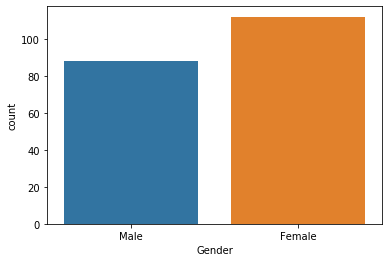

In [6]:
sns.countplot(df1['Gender'])

# Age

In [7]:
df1['Age'].value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

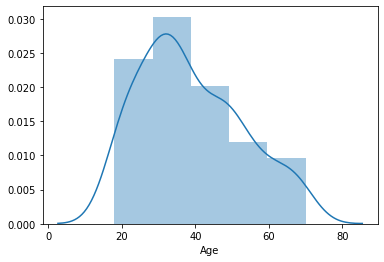

In [8]:
ageplot = sns.distplot(df1['Age'],bins=5)

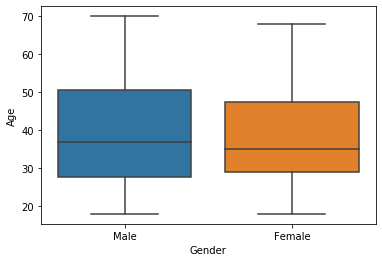

In [9]:
sns.boxplot(x='Gender',y='Age',data=df1)

# Annual Income

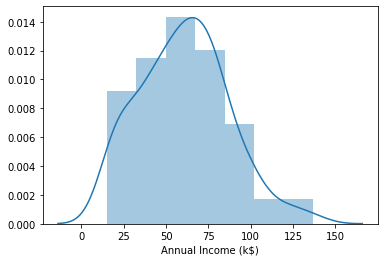

In [10]:
sns.distplot(df1['Annual Income (k$)'],bins=7)

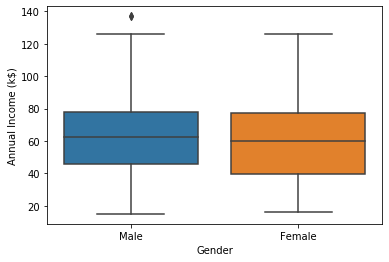

In [11]:
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df1)

# Spending Score

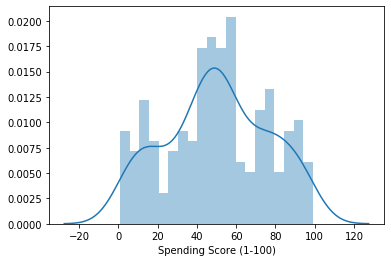

In [12]:
sns.distplot(df1['Spending Score (1-100)'],bins=20)

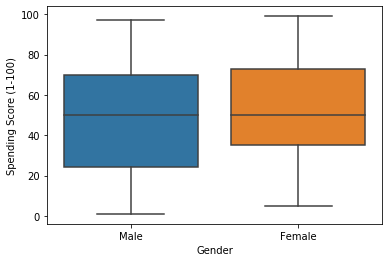

In [13]:
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df1)

In [14]:
'''sns.distplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')
#plt.plot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1)
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1,hue='Gender')'''

"sns.distplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')\n#plt.plot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1)\nsns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1,hue='Gender')"

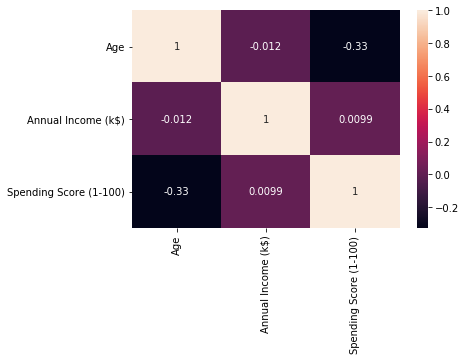

In [15]:
sns.heatmap(df1.drop(['CustomerID'],axis=1).corr(),annot=True)

In [16]:
df2 = df1.drop(columns=['CustomerID'])

In [17]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import KElbowVisualizer

In [18]:
df2.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

# Preprocessing Data

In [19]:
from sklearn.preprocessing import MinMaxScaler

Scaling the data

In [20]:
scaler = MinMaxScaler()  
def Normalize(df):
  for each in df.columns.tolist():
    if str(df[each].dtypes) == 'int64':
      df[each] = scaler.fit_transform(df[each].values.reshape(-1,1))

In [21]:
Normalize(df2)

In [22]:
df2['Gender'] = df2['Gender'].apply(lambda x: 1 if x == "Male" else 0)

In [23]:
df2.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       1  0.019231            0.000000                0.387755
1       1  0.057692            0.000000                0.816327
2       0  0.038462            0.008197                0.051020
3       0  0.096154            0.008197                0.775510
4       0  0.250000            0.016393                0.397959

# AnnualIncome Vs SpendingScore

# With K-Means

In [24]:
X = df2[['Annual Income (k$)','Spending Score (1-100)']]

In [25]:
inertia = []
for n in range(3,11):
  clstr = KMeans(n_clusters=n,init='k-means++',random_state=42)
  clstr.fit(X)
  inertia.append(clstr.inertia_)

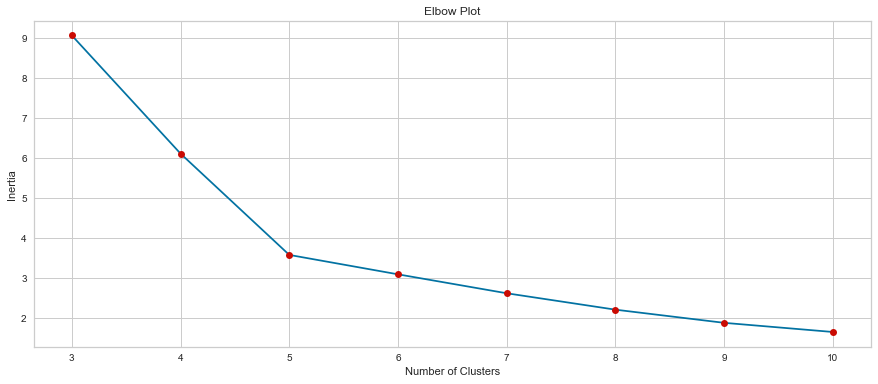

In [26]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(3,11),inertia,'-')
plt.plot(np.arange(3,11),inertia,'o',c='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [27]:
clstr1 = KMeans(n_clusters=5,init='k-means++',random_state=42)
clstr1.fit(X)
labels1 = clstr1.labels_
centroids1 = clstr1.cluster_centers_
X['Clusters'] = labels1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


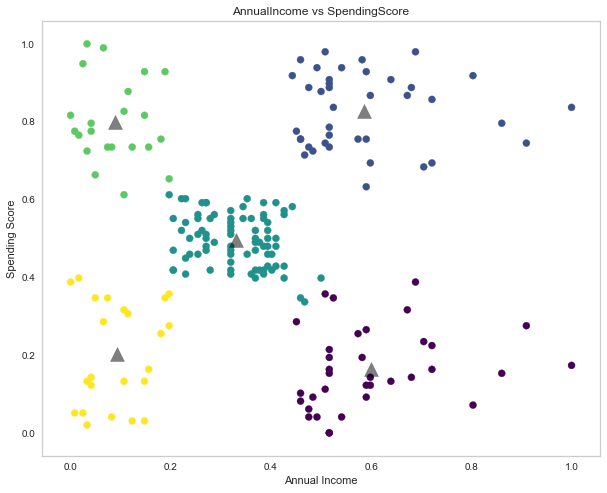

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=labels1,s=50,cmap='viridis')
plt.scatter(centroids1[:,0],centroids1[:,1],marker='^',c='black',s=200,alpha=0.5)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('AnnualIncome vs SpendingScore')
plt.grid(False)
plt.show()

# Validation using Silhouette score

In [29]:
silhouette_score(X[['Annual Income (k$)','Spending Score (1-100)']],X['Clusters'])

0.5594854531227246

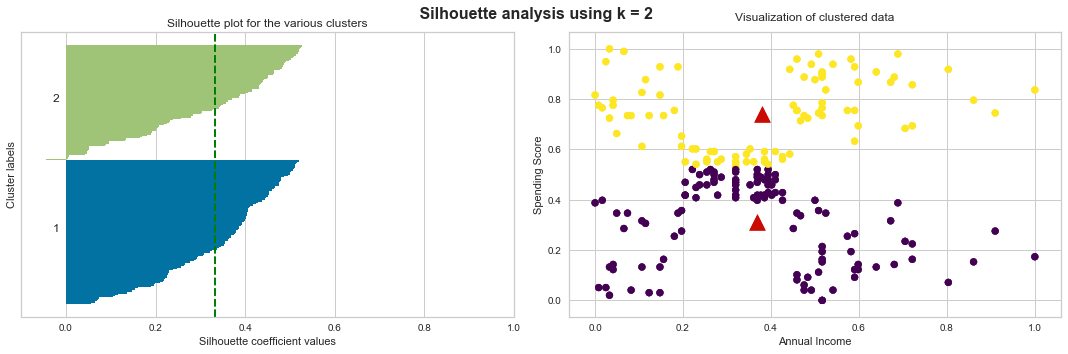

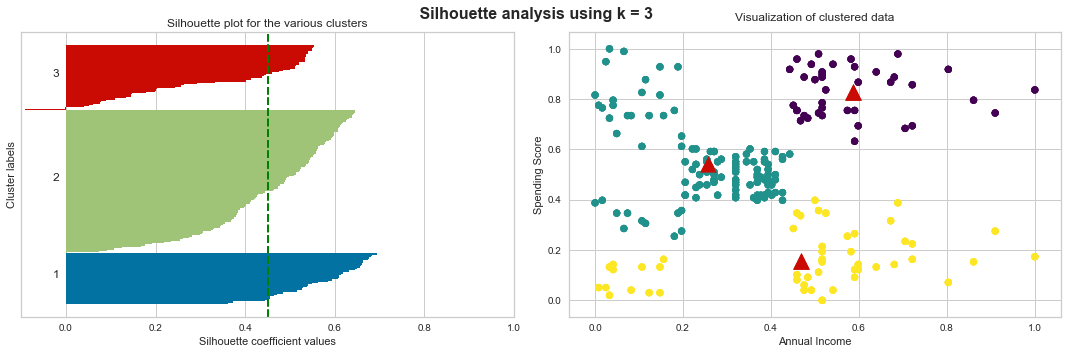

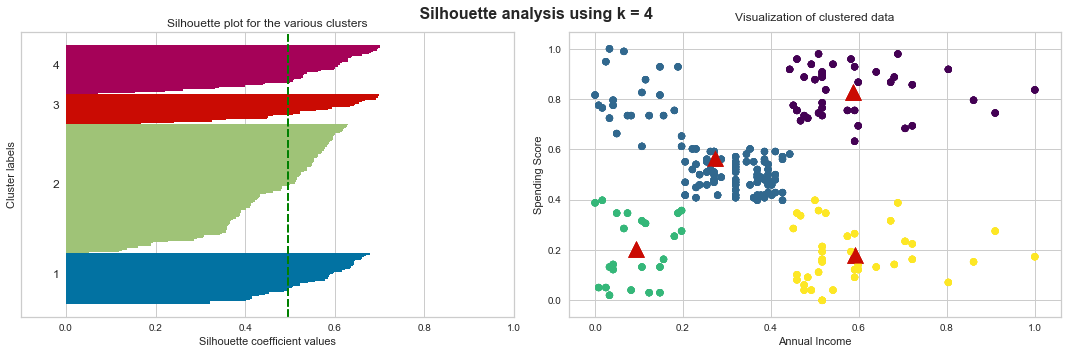

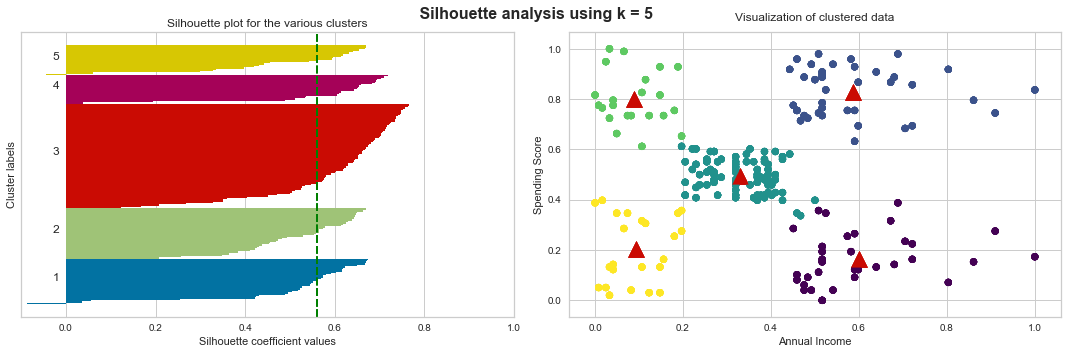

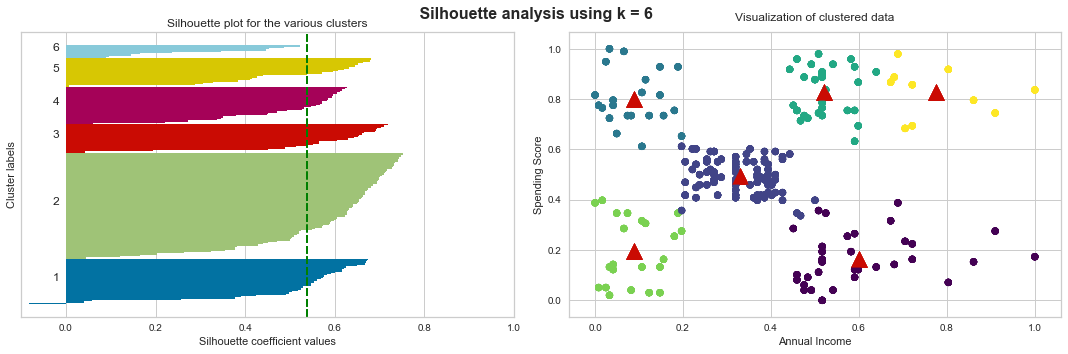

In [30]:
silh_score = []
for k in range(2,7):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  km = KMeans(n_clusters=k,init='k-means++',random_state=42)
  clstr2 = km.fit(X[['Annual Income (k$)','Spending Score (1-100)']])
  labels2 = clstr2.labels_
  centroids2 = clstr2.cluster_centers_
  silhoute_vals = silhouette_samples(X[['Annual Income (k$)','Spending Score (1-100)']],labels2)
  silh_score.append(silhouette_score(X[['Annual Income (k$)','Spending Score (1-100)']],labels2,metric='euclidean'))

  y_ticks = []
  y_lower = y_upper = 0
  for i,cluster in enumerate(np.unique(labels2)):
    cluster_silhouette_vals = silhoute_vals[labels2 == cluster]
    cluster_silhouette_vals.sort()
    y_upper +=len(cluster_silhouette_vals)

    ax[0].barh(range(y_lower,y_upper),cluster_silhouette_vals,height =1)
    
    ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhoute_vals)
    ax[0].axvline(avg_score,linestyle ='--',linewidth =2,color = 'green')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title('Silhouette plot for the various clusters');


    ax[1].scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'] , c = labels2,cmap='viridis');
    ax[1].scatter(centroids2[:,0],centroids2[:,1],marker = '^' , c= 'r',s =250);
    ax[1].set_xlabel('Annual Income')
    ax[1].set_ylabel('Spending Score')
    ax[1].set_title('Visualization of clustered data', y=1.02)

    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')

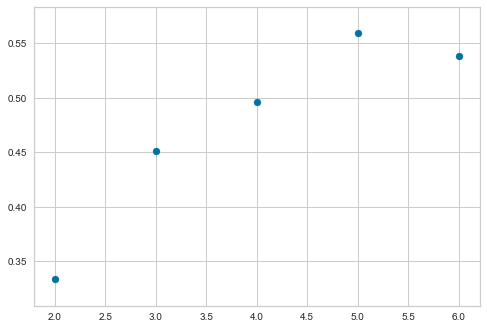

In [31]:
plt.scatter(np.arange(2,7),silh_score)

# With DBScan

Two parameters to be defined for DBSCAN

Minpts: Mininum points that a given point should have to be considered as core point
Epsilon: with point at center of circle neighbor hood is considered when the other point lie inside the radius of epsilon units. Epsilon is calculated by maximum optimal distance between nneighbours to the points.

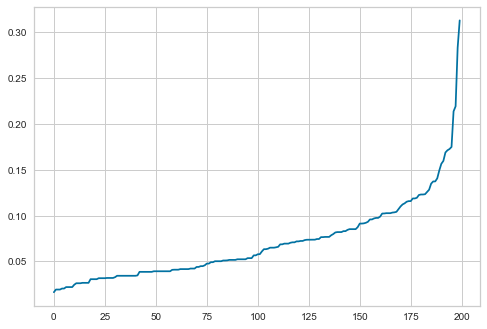

In [32]:
min_pts =6 # choosing minpts depends on the domain or can be choosen by looking at the spread of data

#calculating epsilon
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=min_pts,metric='euclidean').fit(X[['Annual Income (k$)','Spending Score (1-100)']])
distances,indices = nbrs.kneighbors(X[['Annual Income (k$)','Spending Score (1-100)']])
distances = np.sort(distances,axis=0)
distances = distances[:,5]
plt.plot(distances)
plt.show()

In [33]:
epsilon = 0.09 # from the above plot there is increase after elbow point 0.09

In [34]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=epsilon,min_samples=min_pts).fit(X[['Annual Income (k$)','Spending Score (1-100)']])
labels3 = dbscan.labels_

In [35]:
pd.Series(labels3).value_counts()

 2    96
 3    31
 4    24
-1    22
 1    15
 0    12
dtype: int64

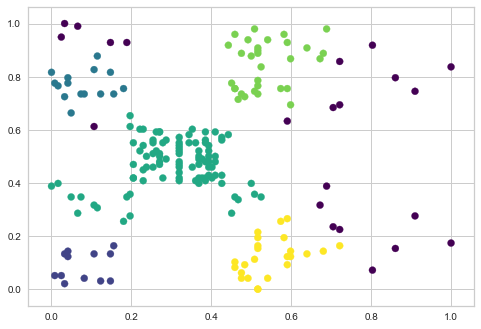

In [36]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=labels3,cmap='viridis')

In [37]:
colors_map = {-1:'black',0:'green',1:'blue',2:'red',3:'yellow',4:'brown',5:'purple',6:'cyan'}
colorlist = ['green','blue','red','yellow','brown','purple','cyan']

In [38]:
X['dbscan_clusters'] = labels3
Y = X[X['dbscan_clusters']!=-1]

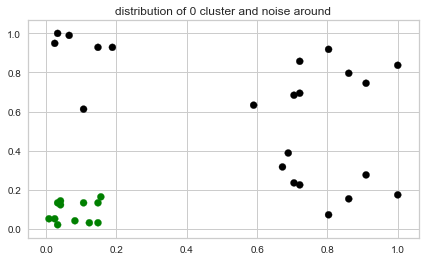

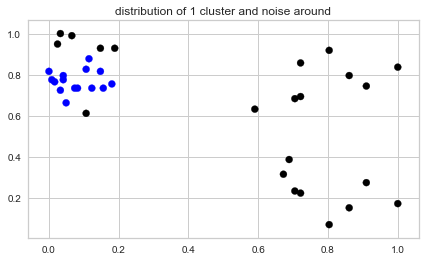

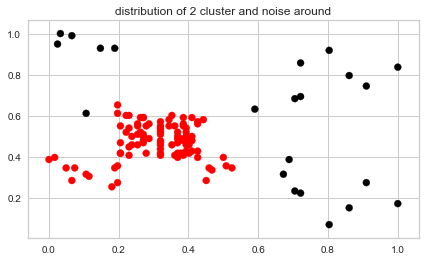

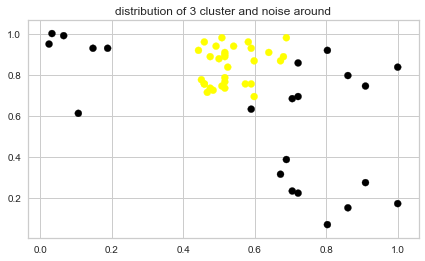

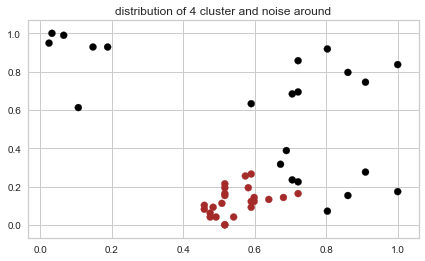

In [39]:
for each in range(0,pd.Series(labels3).nunique()-1):
  fig,ax = plt.subplots(1,1,figsize=(7,4))
  ax.scatter(X[(X['dbscan_clusters']==-1)|(X['dbscan_clusters']==each)]['Annual Income (k$)'],
              X[(X['dbscan_clusters']==-1)|(X['dbscan_clusters']==each)]['Spending Score (1-100)'],
              c=X[(X['dbscan_clusters']==-1)|(X['dbscan_clusters']==each)]['dbscan_clusters'].map(lambda a:colors_map[a]))
  plt.title('distribution of {} cluster and noise around'.format(each))


# Validating clusters with Silhouette Score

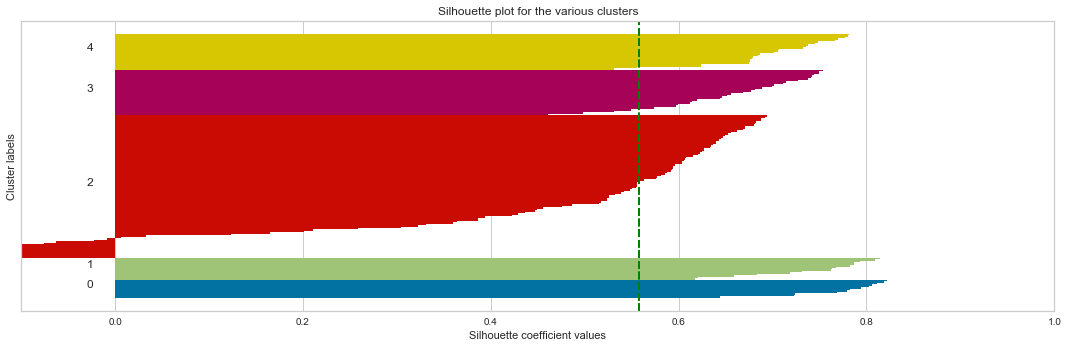

In [40]:
silh_score = []
#for k in range(2,7):
fig,ax = plt.subplots(1,1,figsize=(15,5))

silhoute_vals = silhouette_samples(Y[['Annual Income (k$)','Spending Score (1-100)']],Y['dbscan_clusters'])
#silh_score.append(silhouette_score(Y[['Annual Income (k$)','Spending Score (1-100)']],Y['dbscan_clusters'],metric='euclidean'))

y_ticks = []
y_lower = y_upper = 0

for i,cluster in enumerate(np.unique(Y['dbscan_clusters'])):
  cluster_silhouette_vals = silhoute_vals[Y['dbscan_clusters'] == cluster]
  cluster_silhouette_vals.sort()
  y_upper +=len(cluster_silhouette_vals)

  ax.barh(range(y_lower,y_upper),cluster_silhouette_vals,height =1)
    
  ax.text(-0.03,(y_lower+y_upper)/2,str(i))
  y_lower += len(cluster_silhouette_vals)

  avg_score = np.mean(silhoute_vals)
  ax.axvline(avg_score,linestyle ='--',linewidth =2,color = 'green')
  ax.set_yticks([])
  ax.set_xlim([-0.1, 1])
  ax.set_xlabel('Silhouette coefficient values')
  ax.set_ylabel('Cluster labels')
  ax.set_title('Silhouette plot for the various clusters');

  plt.tight_layout()

In [41]:
silhouette_score(Y[['Annual Income (k$)','Spending Score (1-100)']],Y['dbscan_clusters'],metric='euclidean')

0.5579938123816023

From the above silhouette score mapping , it is clear that average distance of few points from cluster 2 is closest to cluster 1 than cluster 2.This might be due to difference in cluster size of 1 and 2

DBSCAN is best when the clusters are in arbitary shape and since the name itself is density based it works well when the clusters are cllosely paked and of any shape.

Silhouette score of 0.5 is significant enough to consider clusters formed and it is similar to score obtained in the K-Means cluster

In [42]:
X.head()

Annual Income (k$)  Spending Score (1-100)  Clusters  dbscan_clusters
0            0.000000                0.387755         4                2
1            0.000000                0.816327         3                1
2            0.008197                0.051020         4                0
3            0.008197                0.775510         3                1
4            0.016393                0.397959         4                2

# ClusterAnalysis

In [43]:
df1['Kmean_cluster'] = X['Clusters']

In [44]:
df1.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Kmean_cluster  
0              4  
1              3  
2              4  
3              3  
4              4

In [45]:
clstrAnalysis = df1.groupby(['Kmean_cluster'])['Annual Income (k$)','Spending Score (1-100)'].agg({'Annual Income (k$)':['min',np.mean,'max'],'Spending Score (1-100)':['min',np.mean,'max']})

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [46]:
clstrAnalysis

Annual Income (k$)                 Spending Score (1-100)  \
                             min       mean  max                    min   
Kmean_cluster                                                             
0                             70  88.200000  137                      1   
1                             69  86.538462  137                     63   
2                             39  55.296296   76                     34   
3                             15  25.727273   39                     61   
4                             15  26.304348   39                      3   

                              
                    mean max  
Kmean_cluster                 
0              17.114286  39  
1              82.128205  97  
2              49.518519  61  
3              79.363636  99  
4              20.913043  40

In [47]:
z = pd.DataFrame(np.hstack((np.array(clstrAnalysis['Annual Income (k$)']['mean'].rank()).reshape((-1,1)),
                            np.array(clstrAnalysis['Spending Score (1-100)']['mean'].rank()).reshape((-1,1)))),
                 columns=['RankA.Income','RankSpendScore'])


In [48]:
clstrAnalysis2 = pd.concat([clstrAnalysis,z],axis=1)


In [49]:
clstrAnalysis2

(Annual Income (k$), min)  (Annual Income (k$), mean)  \
0                         70                   88.200000   
1                         69                   86.538462   
2                         39                   55.296296   
3                         15                   25.727273   
4                         15                   26.304348   

   (Annual Income (k$), max)  (Spending Score (1-100), min)  \
0                        137                              1   
1                        137                             63   
2                         76                             34   
3                         39                             61   
4                         39                              3   

   (Spending Score (1-100), mean)  (Spending Score (1-100), max)  \
0                       17.114286                             39   
1                       82.128205                             97   
2                       49.518519                             61   
3                       79.363636                             99   
4                       20.913043                             40   

   RankA.Income  RankSpendScore  
0           5.0             1.0  
1           4.0             5.0  
2           3.0             3.0  
3           1.0             4.0  
4           2.0             2.0

Text(0, 0.5, 'RankSpendScore')

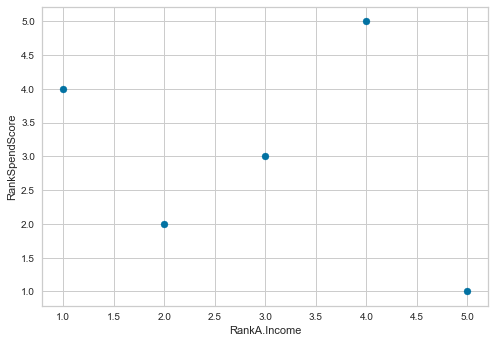

In [50]:
plt.scatter(clstrAnalysis2['RankA.Income'],clstrAnalysis2['RankSpendScore'])
plt.xlabel('RankA.Income')
plt.ylabel('RankSpendScore')

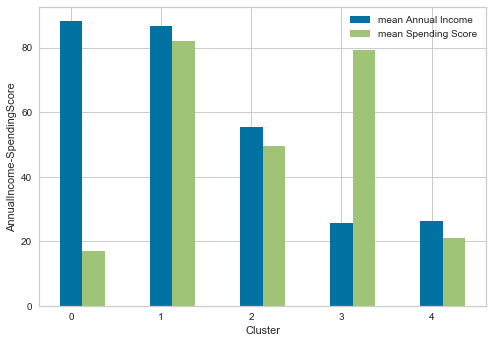

In [51]:
width=0.25
plt.bar(clstrAnalysis2.index,clstrAnalysis2.iloc[:,1],width=width,label='mean Annual Income')
plt.bar(clstrAnalysis2.index+width,clstrAnalysis2.iloc[:,4],width=width,label='mean Spending Score')
plt.ylabel('AnnualIncome-SpendingScore')
plt.xlabel('Cluster')
plt.legend()
plt.show()

From the above plot we can define the clusters as following:

Cluster3:Customers with Less income and High spending score,Less Income with mean of 25k$ and high spending score of mean about 79

Cluster0: Customers with Average Income and Average Spending Score when compared to other customers, Mean of Inome is around 55k$ and mean Spending Score of 49

Cluster1 :Customers with high income and very less expenditure, Mean of income is around 88k and mean spending score is around 17

Cluster4:Customers with high income and high expenditure, mean of income is around 86k$ and mean spending score around 82

Cluster2:Customers with less income and less expenditure, mean of income is around 26k$ and mean spending score around 20



# Including Age

Since age has shown some pattern along with Spending , lets include Age to check whether we can form some interpretable clusters

In [52]:
X = df2[['Age','Annual Income (k$)','Spending Score (1-100)']]


In [53]:
X.head()


Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959

In [54]:
inertia = []
for n in range(2,11):
  clstr = KMeans(n_clusters=n,init='k-means++',random_state=42)
  clstr.fit(X)
  inertia.append(clstr.inertia_)

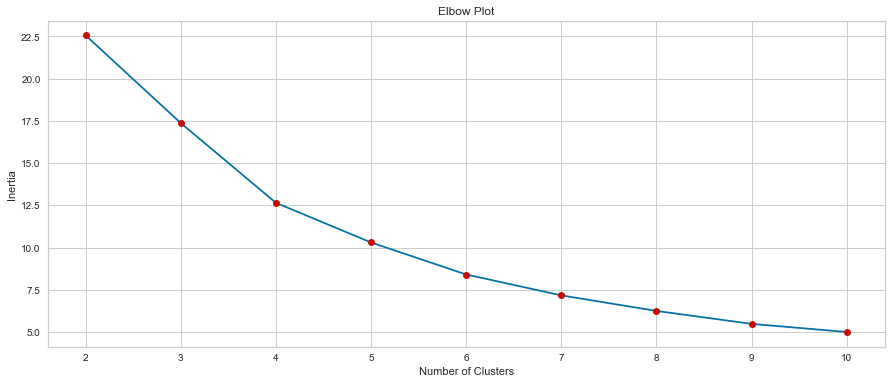

In [55]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(2,11),inertia,'-')
plt.plot(np.arange(2,11),inertia,'o',c='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [56]:
clstr1 = KMeans(n_clusters=4,init='k-means++')
clstr1.fit(X)
labels1 = clstr1.labels_
centroids1 = clstr1.cluster_centers_
X['Clusters'] = labels1

In [57]:
import plotly.express as px
fig = px.scatter_3d(X,x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',color=pd.Series(labels1).map(lambda a:colors_map[a]))
fig.show()

# Validating Clusters with Silhouette Score

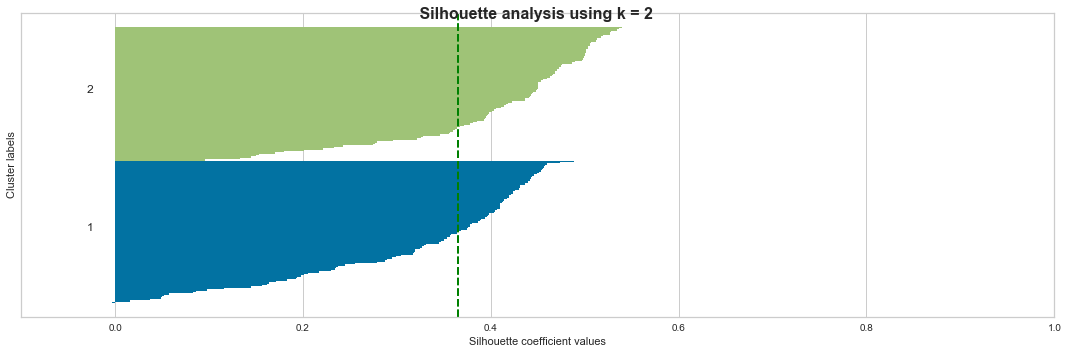

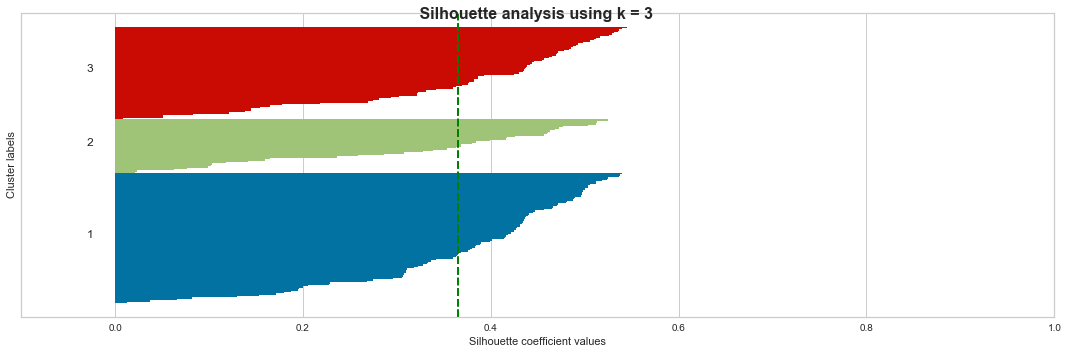

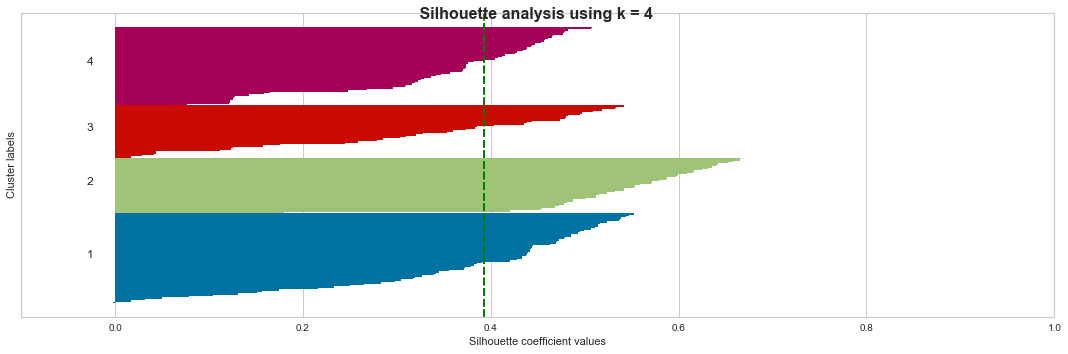

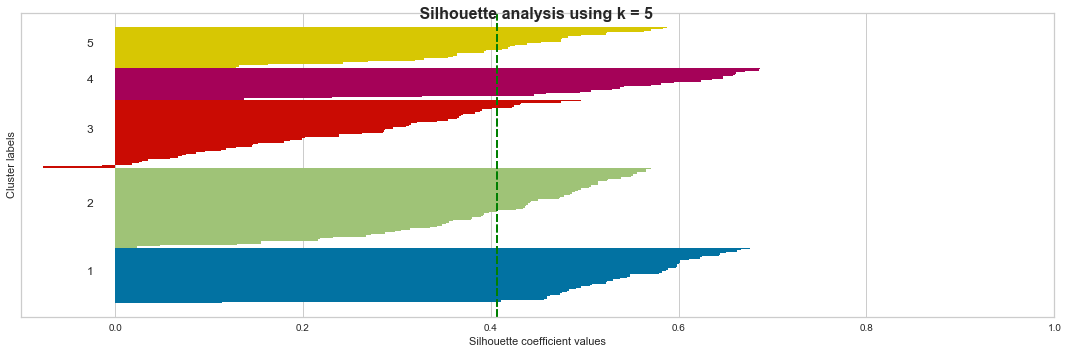

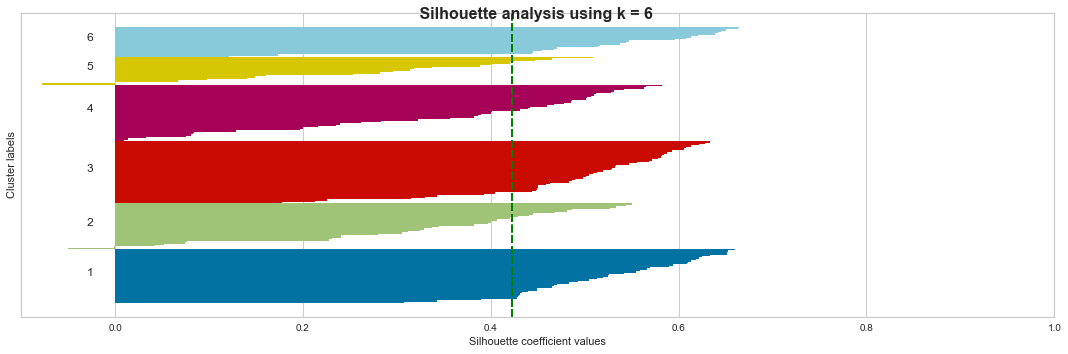

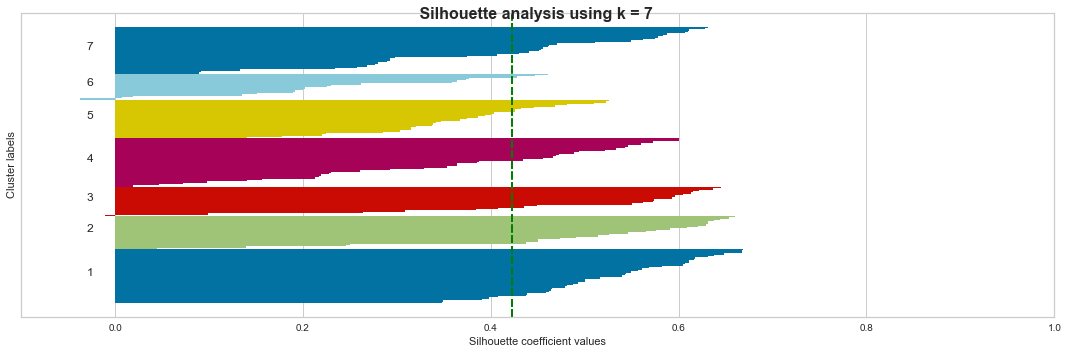

In [58]:
silh_score = []
for k in range(2,8):
  fig,ax = plt.subplots(1,1,figsize=(15,5))
  km = KMeans(n_clusters=k,init='k-means++')
  clstr2 = km.fit(X[['Age','Annual Income (k$)','Spending Score (1-100)']])
  labels2 = clstr2.labels_
  centroids2 = clstr2.cluster_centers_
  silhoute_vals = silhouette_samples(X[['Age','Annual Income (k$)','Spending Score (1-100)']],labels2)
  silh_score.append(silhouette_score(X[['Age','Annual Income (k$)','Spending Score (1-100)']],labels2,metric='euclidean'))

  y_ticks = []
  y_lower = y_upper = 0
  for i,cluster in enumerate(np.unique(labels2)):
    cluster_silhouette_vals = silhoute_vals[labels2 == cluster]
    cluster_silhouette_vals.sort()
    y_upper +=len(cluster_silhouette_vals)

    ax.barh(range(y_lower,y_upper),cluster_silhouette_vals,height =1)
    
    ax.text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhoute_vals)
    ax.axvline(avg_score,linestyle ='--',linewidth =2,color = 'green')
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster labels')


    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')

Clusters 2,3,4 having all silhouette scores in positive 5,6 clusters might have some points wrongly clustered which can be seen in respective clusters in the above plot with negative values

Text(0, 0.5, 'silhouette_score')

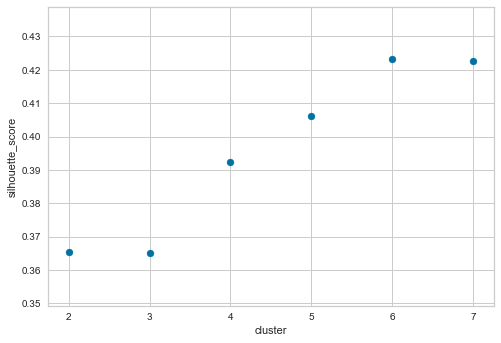

In [59]:
plt.scatter(np.arange(2,8),silh_score)
plt.xlabel('cluster')
plt.ylabel('silhouette_score')

We can stick with number of clusters as 4 even though silhouette score is less when compared to 5 and 6 but the silhouette values are all positive which is not the case with 5 and 6 clusters.

In [60]:
df1['cluster_labels2'] = labels1

In [61]:
df1['cluster_labels2'].value_counts()

3    65
2    57
0    40
1    38
Name: cluster_labels2, dtype: int64

# Cluster Analysis

In [62]:
df1.groupby(['cluster_labels2'])['Age','Annual Income (k$)','Spending Score (1-100)'].agg({'Age':['min',np.mean,'max'],'Annual Income (k$)':['min',np.mean,'max'],'Spending Score (1-100)':['min',np.mean,'max']})

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Age                Annual Income (k$)                  \
                min       mean max                min       mean  max   
cluster_labels2                                                         
0                27  32.875000  40                 69  86.100000  137   
1                19  39.368421  59                 64  86.500000  137   
2                18  25.438596  38                 15  40.000000   67   
3                35  53.984615  70                 18  47.707692   79   

                Spending Score (1-100)                 
                                   min       mean max  
cluster_labels2                                        
0                                   58  81.525000  97  
1                                    1  19.578947  42  
2                                    6  60.298246  99  
3                                    3  39.969231  60

In [63]:
clstrAnalysis = df1.groupby(['cluster_labels2'])['Age','Annual Income (k$)','Spending Score (1-100)'].agg({'Age':['min',np.mean,'max'],'Annual Income (k$)':['min',np.mean,'max'],'Spending Score (1-100)':['min',np.mean,'max']})

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Clusters are ranked according to mean values of Age,Income,SpendingScore where 1 being the least mean.

In [64]:
z = pd.DataFrame(np.hstack((np.array(clstrAnalysis['Age']['mean'].rank()).reshape((-1,1)),
                            np.array(clstrAnalysis['Annual Income (k$)']['mean'].rank()).reshape((-1,1)),
                            np.array(clstrAnalysis['Spending Score (1-100)']['mean'].rank()).reshape((-1,1)))),
                 columns=['RankAge','RankA.Income','RankSpendScore'])


In [65]:
clstrAnalysis2 = pd.concat([clstrAnalysis,z],axis=1)

In [66]:
clstrAnalysis2

(Age, min)  (Age, mean)  (Age, max)  (Annual Income (k$), min)  \
0          27    32.875000          40                         69   
1          19    39.368421          59                         64   
2          18    25.438596          38                         15   
3          35    53.984615          70                         18   

   (Annual Income (k$), mean)  (Annual Income (k$), max)  \
0                   86.100000                        137   
1                   86.500000                        137   
2                   40.000000                         67   
3                   47.707692                         79   

   (Spending Score (1-100), min)  (Spending Score (1-100), mean)  \
0                             58                       81.525000   
1                              1                       19.578947   
2                              6                       60.298246   
3                              3                       39.969231   

   (Spending Score (1-100), max)  RankAge  RankA.Income  RankSpendScore  
0                             97      2.0           3.0             4.0  
1                             42      3.0           4.0             1.0  
2                             99      1.0           1.0             3.0  
3                             60      4.0           2.0             2.0

In [67]:
fig = px.scatter_3d(clstrAnalysis2,x='RankAge',y='RankA.Income',z='RankSpendScore')
fig.show()

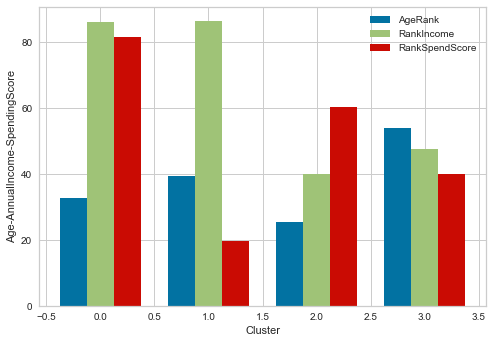

In [69]:
width=0.25
plt.bar(clstrAnalysis2.index-width,clstrAnalysis2.iloc[:,1],width=width,label='AgeRank')
plt.bar(clstrAnalysis2.index,clstrAnalysis2.iloc[:,4],width=width,label='RankIncome')
plt.bar(clstrAnalysis2.index+width,clstrAnalysis2.iloc[:,7],width=width,label='RankSpendScore')
plt.ylabel('Age-AnnualIncome-SpendingScore')
plt.xlabel('Cluster')
plt.legend()
plt.show()


From the above plots we can interpret the clusters as following

Cluster0:Customers with High Age(mean 53), Medium income(mean 47) and Average Spending Score(mean 39).
Cluster1:Customers with Minimum age group(mean 25), Less income(mean 40) and Medium spending score(mean 60).
Cluster2:Customers with Medium Age(mean 39), High Income(mean86) and Minimum Spending Score(mean 19).
Cluster3:Customers with Medium Age(mean 32), High Income(mean 86) and High Sending Score(mean 81)

Every cluster is unique.